In [1]:
from preprocessing import *
from imblearn.under_sampling import OneSidedSelection
from sklearn.preprocessing import OneHotEncoder

In [11]:
seed = 17

In [2]:
data, test_data = load_data("../data/")

In [3]:
X, y, x, enc_ids, cat_feat = preprocessing_and_fe(data, test_data)

In [6]:
combined_df = pd.concat([X, x], axis= 0)

In [7]:
combined_df

,enc_id,patient_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,diag_1,diag_2,diag_3,number_diagnoses,change,diabetesMed,drug_up,drug_down,drug_steady,pat_cnt
0,-0.748025,2488608.0,2.0,1.0,6.0,1.0,2.0,6.0,3.0,6.0,...,43.0,44.0,44.0,5.0,0.0,1.0,0.0,0.0,2.0,-0.514042
1,-0.712439,52133202.0,2.0,1.0,7.0,2.0,6.0,1.0,7.0,7.0,...,43.0,44.0,46.0,9.0,1.0,1.0,0.0,0.0,1.0,-0.105474
2,0.041350,40945509.0,2.0,0.0,7.0,3.0,2.0,1.0,7.0,14.0,...,54.0,53.0,106.0,9.0,0.0,1.0,1.0,0.0,0.0,2.345931
3,1.049637,38850777.0,2.0,0.0,5.0,1.0,1.0,7.0,1.0,8.0,...,63.0,62.0,26.0,8.0,1.0,1.0,0.0,0.0,1.0,-0.514042
4,-0.141917,72738225.0,2.0,0.0,8.0,1.0,6.0,7.0,6.0,7.0,...,25.0,75.0,75.0,9.0,0.0,1.0,0.0,1.0,0.0,-0.514042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30525,0.042499,23401863.0,0.0,0.0,7.0,1.0,6.0,7.0,2.0,7.0,...,42.0,9.0,46.0,5.0,1.0,1.0,0.0,0.0,1.0,0.303093
30526,-1.239109,12267054.0,2.0,1.0,5.0,3.0,18.0,4.0,2.0,17.0,...,43.0,42.0,26.0,8.0,1.0,0.0,0.0,0.0,0.0,-0.514042
30527,0.755734,98403552.0,2.0,0.0,7.0,1.0,3.0,7.0,5.0,7.0,...,54.0,44.0,52.0,9.0,0.0,1.0,1.0,0.0,0.0,0.711661
30528,0.379860,87646410.0,2.0,0.0,8.0,1.0,3.0,7.0,2.0,7.0,...,81.0,51.0,46.0,9.0,0.0,1.0,0.0,0.0,2.0,0.711661


In [8]:
cat_columns = ['race', 'gender', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty', 'diabetesMed']

In [9]:
combined_df_encoded = pd.get_dummies(combined_df, columns=cat_columns)

In [10]:
combined_df_encoded

,enc_id,patient_id,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,medical_specialty_61.0,medical_specialty_62.0,medical_specialty_63.0,medical_specialty_64.0,medical_specialty_65.0,medical_specialty_66.0,medical_specialty_67.0,medical_specialty_68.0,diabetesMed_0.0,diabetesMed_1.0
0,-0.748025,2488608.0,6.0,3.0,54.0,3.0,10.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
1,-0.712439,52133202.0,7.0,7.0,50.0,6.0,35.0,2.0,1.0,0.0,...,False,False,False,False,False,False,False,True,False,True
2,0.041350,40945509.0,7.0,7.0,49.0,4.0,20.0,2.0,0.0,4.0,...,False,False,False,False,False,False,False,True,False,True
3,1.049637,38850777.0,5.0,1.0,1.0,1.0,15.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,True
4,-0.141917,72738225.0,8.0,6.0,58.0,2.0,26.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30525,0.042499,23401863.0,7.0,2.0,44.0,0.0,19.0,0.0,2.0,0.0,...,False,False,False,False,False,False,False,False,False,True
30526,-1.239109,12267054.0,5.0,2.0,19.0,3.0,10.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,True,False
30527,0.755734,98403552.0,7.0,5.0,73.0,3.0,24.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,True
30528,0.379860,87646410.0,8.0,2.0,63.0,0.0,13.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,True,False,True


In [12]:
X = combined_df_encoded.iloc[:len(X)]

In [13]:
quant_columns = ['enc_id', 'patient_id', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'change', 'drug_up', 'drug_down',
       'drug_steady', 'pat_cnt']

In [14]:
# sns.boxplot(data=X)

In [15]:
ss = StandardScaler()

In [16]:
X = ss.fit_transform(X)

In [43]:
x = combined_df_encoded.iloc[len(X):]
x = ss.transform(x)
x = x.astype('float32')

In [17]:
y.value_counts()

readmission_id
2    38405
1    24881
0     7950
Name: count, dtype: int64

In [18]:
oss = OneSidedSelection(random_state=17)

In [19]:
# X, y = oss.fit_resample(X, y)

In [20]:
y.value_counts()

readmission_id
2    38405
1    24881
0     7950
Name: count, dtype: int64

In [21]:
# sns.boxplot(data=X)

In [22]:
import torch.nn as nn
import torch

In [23]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [24]:
X = X.astype('float32')
x = x.astype('float32')

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X

,enc_id,patient_id,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,medical_specialty_61.0,medical_specialty_62.0,medical_specialty_63.0,medical_specialty_64.0,medical_specialty_65.0,medical_specialty_66.0,medical_specialty_67.0,medical_specialty_68.0,diabetesMed_0.0,diabetesMed_1.0
0,-0.748025,-1.337702,-0.059131,-0.468019,0.553819,0.971800,-0.739963,-0.292225,-0.226472,-0.500562,...,-0.068531,-0.010598,-0.019472,-0.034154,-0.074099,-0.017971,-0.081146,-0.980867,-0.546010,0.546010
1,-0.712439,-0.053857,0.568249,0.874298,0.350347,2.730738,2.334786,1.282668,0.930179,-0.500562,...,-0.068531,-0.010598,-0.019472,-0.034154,-0.074099,-0.017971,-0.081146,1.019506,-0.546010,0.546010
2,0.041350,-0.343179,0.568249,0.874298,0.299479,1.558112,0.489936,1.282668,-0.226472,2.650836,...,-0.068531,-0.010598,-0.019472,-0.034154,-0.074099,-0.017971,-0.081146,1.019506,-0.546010,0.546010
3,1.049637,-0.397350,-0.686511,-1.139178,-2.142181,-0.200826,-0.125013,-0.292225,-0.226472,-0.500562,...,-0.068531,-0.010598,-0.019472,-0.034154,-0.074099,-0.017971,-0.081146,1.019506,-0.546010,0.546010
4,-0.141917,0.479004,1.195629,0.538719,0.757290,0.385487,1.227876,0.495221,-0.226472,-0.500562,...,-0.068531,-0.010598,-0.019472,-0.034154,-0.074099,-0.017971,-0.081146,1.019506,-0.546010,0.546010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,0.325591,0.797751,0.568249,0.538719,0.909894,-0.787139,-0.248003,-0.292225,-0.226472,-0.500562,...,-0.068531,-0.010598,-0.019472,-0.034154,-0.074099,-0.017971,-0.081146,1.019506,-0.546010,0.546010
71232,0.119041,0.828282,1.823009,0.203140,-0.361804,-0.787139,-0.493983,1.282668,-0.226472,-0.500562,...,-0.068531,-0.010598,-0.019472,-0.034154,-0.074099,-0.017971,-0.081146,1.019506,1.831469,-1.831469
71233,-1.112552,-1.269359,0.568249,0.538719,0.960762,2.730738,1.473856,-0.292225,-0.226472,-0.500562,...,-0.068531,-0.010598,-0.019472,-0.034154,-0.074099,-0.017971,-0.081146,-0.980867,-0.546010,0.546010
71234,0.499012,0.821163,-0.686511,-0.132440,-0.717879,-0.200826,-0.616973,-0.292225,-0.226472,-0.500562,...,-0.068531,-0.010598,-0.019472,-0.034154,-0.074099,-0.017971,-0.081146,-0.980867,-0.546010,0.546010


In [27]:
x_train, x_val, y_train, y_val = train_test_split(X, y, random_state=42,stratify=y)

In [28]:
class Data(Dataset):
    def __init__(self, x, y):
        self.x=torch.from_numpy(x)
        self.y=torch.from_numpy(y)
        self.len=self.x.shape[0]
    def __getitem__(self,index):      
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len

In [29]:
train_dataset = Data(x_train.to_numpy(), y_train.to_numpy())
test_dataset = Data(x_val.to_numpy(), y_val.to_numpy())

In [30]:
train_dataloader = DataLoader(train_dataset,batch_size=64)
test_dataloader = DataLoader(test_dataset,batch_size=64)

In [31]:
class ANN(nn.Module):
    def __init__(
        self,
        in_dim: int,
        hidden_dim_1: int,
        hidden_dim_2: int,
        n_classes:int = 3,
        dropout:float = 0.2
    ):
        super().__init__()
        
        self.layer1 = nn.Sequential(
            nn.Linear(in_features=in_dim, out_features=hidden_dim_1),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_dim_1),
            nn.Dropout(dropout),
        )
        self.layer2 = nn.Sequential(
            nn.Linear(in_features=hidden_dim_1, out_features=hidden_dim_2),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_dim_2),
            nn.Dropout(dropout),
        )
        self.output_layer = nn.Linear(in_features=hidden_dim_2, out_features=n_classes)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.output_layer(x)
        return x

In [32]:
model = ANN(167,100,20).to(device)

In [33]:
n_epochs = 25
lr = 1e-4
optimiser = torch.optim.Adam(model.parameters(), lr=lr)
loss_fn = torch.nn.CrossEntropyLoss()

In [34]:
import matplotlib.pyplot as plt
losses = []
accuracies = []
f1s = []
def train_epoch(model, dataloader, optimiser):
    model.train()
    loss_sum = 0
    for batch in tqdm(dataloader):
        x, y = batch[0].to(device), batch[1].to(device)
        output = model(x)
        output = nn.Softmax(dim=-1)(output)
        loss = loss_fn(output, y)
        loss_sum += loss.item()  

        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
    loss_sum /= len(dataloader)
    losses.append(loss_sum)
        
        
def validate(model):
    model.eval()
    output = model(torch.from_numpy(x_val.to_numpy()).to(device))
    output = nn.Softmax(dim=-1)(output)
    preds = torch.argmax(output,dim=-1)
            
        
    acc = accuracy_score(y_true=y_val.to_numpy(), y_pred=preds.cpu())
    accuracies.append(acc)
    f1 = f1_score(y_true=y_val.to_numpy(), y_pred=preds.cpu(), average='macro')
    f1s.append(f1)
    
    return acc, f1

In [35]:
def train_model(model, train_dataloader, test_dataloader, optimiser):
    for epoch in range(1, n_epochs+1):
        start_time = time.time()
        
        print(f"========= EPOCH {epoch} STARTED =========")
        train_epoch(model=model, dataloader=train_dataloader, optimiser=optimiser)
        
        print(f"========= TEST EVALUATION STARTED =========")
        test_val_op = validate(model=model)
        
        print(f"END OF {epoch} EPOCH")
        print(f"| Time taken: {time.time() - start_time: 7.3f} |")
        print(f"| Test acc: {test_val_op[0]: 1.5f}  | Test f1: {test_val_op[1]: 1.5f}  |")

========= EPOCH 1 STARTED =========


100%|██████████| 835/835 [00:07<00:00, 105.42it/s]


========= TEST EVALUATION STARTED =========
END OF 1 EPOCH
| Time taken:   7.957 |
| Test acc:  0.60520  | Test f1:  0.44578  |
========= EPOCH 2 STARTED =========


100%|██████████| 835/835 [00:03<00:00, 217.92it/s]


========= TEST EVALUATION STARTED =========
END OF 2 EPOCH
| Time taken:   3.863 |
| Test acc:  0.65495  | Test f1:  0.45202  |
========= EPOCH 3 STARTED =========


100%|██████████| 835/835 [00:03<00:00, 219.52it/s]


========= TEST EVALUATION STARTED =========
END OF 3 EPOCH
| Time taken:   3.836 |
| Test acc:  0.67090  | Test f1:  0.46021  |
========= EPOCH 4 STARTED =========


100%|██████████| 835/835 [00:03<00:00, 214.83it/s]


========= TEST EVALUATION STARTED =========
END OF 4 EPOCH
| Time taken:   3.918 |
| Test acc:  0.68112  | Test f1:  0.46576  |
========= EPOCH 5 STARTED =========


100%|██████████| 835/835 [00:03<00:00, 212.65it/s]


========= TEST EVALUATION STARTED =========
END OF 5 EPOCH
| Time taken:   3.957 |
| Test acc:  0.68628  | Test f1:  0.47122  |
========= EPOCH 6 STARTED =========


100%|██████████| 835/835 [00:03<00:00, 212.62it/s]


========= TEST EVALUATION STARTED =========
END OF 6 EPOCH
| Time taken:   3.958 |
| Test acc:  0.69285  | Test f1:  0.47852  |
========= EPOCH 7 STARTED =========


100%|██████████| 835/835 [00:03<00:00, 216.60it/s]


========= TEST EVALUATION STARTED =========
END OF 7 EPOCH
| Time taken:   3.886 |
| Test acc:  0.69734  | Test f1:  0.48189  |
========= EPOCH 8 STARTED =========


100%|██████████| 835/835 [00:03<00:00, 219.08it/s]


========= TEST EVALUATION STARTED =========
END OF 8 EPOCH
| Time taken:   3.842 |
| Test acc:  0.70279  | Test f1:  0.48772  |
========= EPOCH 9 STARTED =========


100%|██████████| 835/835 [00:03<00:00, 209.00it/s]


========= TEST EVALUATION STARTED =========
END OF 9 EPOCH
| Time taken:   4.026 |
| Test acc:  0.70532  | Test f1:  0.48877  |
========= EPOCH 10 STARTED =========


100%|██████████| 835/835 [00:03<00:00, 218.59it/s]


========= TEST EVALUATION STARTED =========
END OF 10 EPOCH
| Time taken:   3.850 |
| Test acc:  0.70644  | Test f1:  0.48971  |
========= EPOCH 11 STARTED =========


100%|██████████| 835/835 [00:03<00:00, 218.96it/s]


========= TEST EVALUATION STARTED =========
END OF 11 EPOCH
| Time taken:   3.845 |
| Test acc:  0.70745  | Test f1:  0.49313  |
========= EPOCH 12 STARTED =========


100%|██████████| 835/835 [00:04<00:00, 187.68it/s]


========= TEST EVALUATION STARTED =========
END OF 12 EPOCH
| Time taken:   4.479 |
| Test acc:  0.70925  | Test f1:  0.49311  |
========= EPOCH 13 STARTED =========


100%|██████████| 835/835 [00:03<00:00, 213.92it/s]


========= TEST EVALUATION STARTED =========
END OF 13 EPOCH
| Time taken:   3.934 |
| Test acc:  0.71104  | Test f1:  0.49597  |
========= EPOCH 14 STARTED =========


100%|██████████| 835/835 [00:03<00:00, 221.80it/s]


========= TEST EVALUATION STARTED =========
END OF 14 EPOCH
| Time taken:   3.796 |
| Test acc:  0.71133  | Test f1:  0.49540  |
========= EPOCH 15 STARTED =========


100%|██████████| 835/835 [00:03<00:00, 217.99it/s]


========= TEST EVALUATION STARTED =========
END OF 15 EPOCH
| Time taken:   3.861 |
| Test acc:  0.71267  | Test f1:  0.49844  |
========= EPOCH 16 STARTED =========


100%|██████████| 835/835 [00:03<00:00, 217.05it/s]


========= TEST EVALUATION STARTED =========
END OF 16 EPOCH
| Time taken:   3.878 |
| Test acc:  0.71352  | Test f1:  0.49903  |
========= EPOCH 17 STARTED =========


100%|██████████| 835/835 [00:04<00:00, 207.70it/s]


========= TEST EVALUATION STARTED =========
END OF 17 EPOCH
| Time taken:   4.058 |
| Test acc:  0.71413  | Test f1:  0.50020  |
========= EPOCH 18 STARTED =========


100%|██████████| 835/835 [00:04<00:00, 195.95it/s]


========= TEST EVALUATION STARTED =========
END OF 18 EPOCH
| Time taken:   4.293 |
| Test acc:  0.71447  | Test f1:  0.50348  |
========= EPOCH 19 STARTED =========


100%|██████████| 835/835 [00:04<00:00, 205.07it/s]


========= TEST EVALUATION STARTED =========
END OF 19 EPOCH
| Time taken:   4.103 |
| Test acc:  0.71498  | Test f1:  0.50491  |
========= EPOCH 20 STARTED =========


100%|██████████| 835/835 [00:03<00:00, 212.24it/s]


========= TEST EVALUATION STARTED =========
END OF 20 EPOCH
| Time taken:   3.965 |
| Test acc:  0.71599  | Test f1:  0.50779  |
========= EPOCH 21 STARTED =========


100%|██████████| 835/835 [00:03<00:00, 217.37it/s]


========= TEST EVALUATION STARTED =========
END OF 21 EPOCH
| Time taken:   3.871 |
| Test acc:  0.71576  | Test f1:  0.50553  |
========= EPOCH 22 STARTED =========


100%|██████████| 835/835 [00:03<00:00, 219.35it/s]


========= TEST EVALUATION STARTED =========
END OF 22 EPOCH
| Time taken:   3.837 |
| Test acc:  0.71621  | Test f1:  0.50796  |
========= EPOCH 23 STARTED =========


100%|██████████| 835/835 [00:03<00:00, 218.18it/s]


========= TEST EVALUATION STARTED =========
END OF 23 EPOCH
| Time taken:   3.857 |
| Test acc:  0.71582  | Test f1:  0.50768  |
========= EPOCH 24 STARTED =========


100%|██████████| 835/835 [00:03<00:00, 218.69it/s]


========= TEST EVALUATION STARTED =========
END OF 24 EPOCH
| Time taken:   3.849 |
| Test acc:  0.71728  | Test f1:  0.50726  |
========= EPOCH 25 STARTED =========


100%|██████████| 835/835 [00:03<00:00, 215.14it/s]
c:\programming\ml\ml-assignment-1\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\programming\ml\ml-assignment-1\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


========= TEST EVALUATION STARTED =========
END OF 25 EPOCH
| Time taken:   3.912 |
| Test acc:  0.71773  | Test f1:  0.50693  |


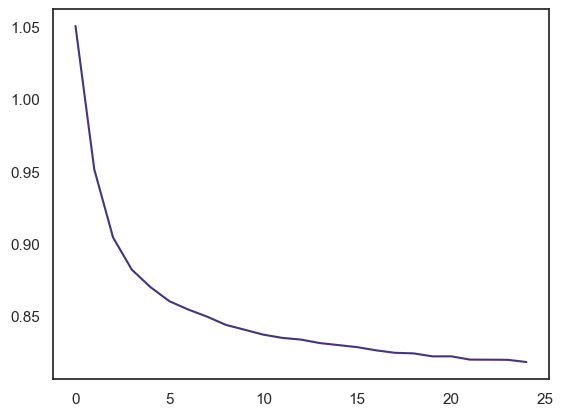

c:\programming\ml\ml-assignment-1\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\programming\ml\ml-assignment-1\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


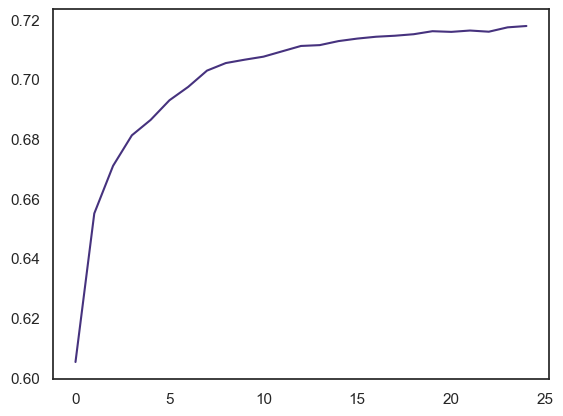

c:\programming\ml\ml-assignment-1\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\programming\ml\ml-assignment-1\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


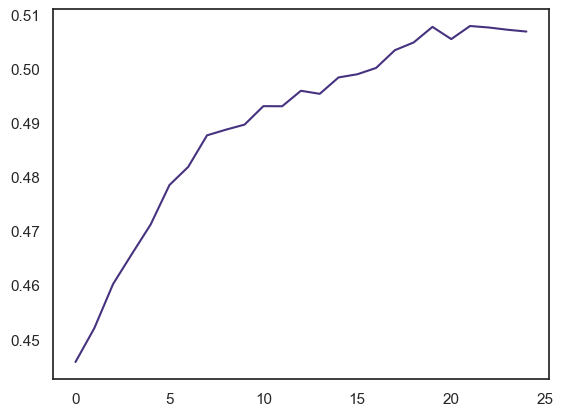

In [36]:
train_model(
    model=model,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    optimiser=optimiser,
)
sns.lineplot(x=range(len(losses)), y=losses)
plt.show()
sns.lineplot(x=range(len(accuracies)), y=accuracies)
plt.show()
sns.lineplot(x=range(len(f1s)), y=f1s)
plt.show()

In [44]:
output = model(torch.from_numpy(x.to_numpy()).to(device))
output = nn.Softmax(dim=-1)(output)
preds = torch.argmax(output,dim=-1)

In [45]:
preds.bincount()

tensor([  132, 11018, 19380], device='cuda:0')

In [46]:
submission = pd.DataFrame({"enc_id":enc_ids, "readmission_id": preds.cpu().numpy()})

In [47]:
submission.to_csv("./nn_3.csv", index=False)